In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d enesumcu/car-and-truck

In [ ]:
!unzip car-and-truck.zip

In [3]:
!pip install fastai==1.0.61

In [4]:
import pandas as pd
import numpy as np
from fastai.imports import *
from fastai import *
from fastai.vision import *
#from torchvision.models import *

In [5]:
path = '/content/datasets/Datasets'

Removing images that can't be opened

In [6]:
for c in ["truck", "car"]:
  print(c)
  verify_images(path+"/"+c, delete=True, max_size=500)

truck


car


In [7]:
cars = (len(os.listdir(path+"/car")))
trucks = (len(os.listdir(path+"/truck")))

In [8]:
def data_frame(data_dir):
    a=[]
    for i in os.listdir(data_dir):
        for k,j in enumerate(os.listdir(data_dir+'/'+i)):
            a.append((f'/{i}/{j}',i))
    return pd.DataFrame(a,columns=['filename','class'])

In [9]:
df = data_frame(path)
print(df.shape)
df.head() 

(788, 2)


,filename,class
0,/car/556310.jpg,car
1,/car/images (7).jpg,car
2,/car/188317.jpg,car
3,/car/636308.jpg,car
4,/car/600109.jpg,car


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        df['filename'], df['class'],stratify=df['class'], test_size=0.1)

In [11]:
train = pd.DataFrame(zip(X_train.values, y_train.values), columns=['filename', 'class'], index=None)
test = pd.DataFrame(zip(X_test.values, y_test.values), columns=['filename', 'class'], index=None)
test['filename'] = path + test['filename']

In [12]:
data = ImageDataBunch.from_df(path, train, 
                                  valid_pct=0.2, 
                                  bs=32, 
                                  size=256).normalize(imagenet_stats)

In [13]:
data

ImageDataBunch;

Train: LabelList (568 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
truck,car,car,truck,car
Path: /content/datasets/Datasets;

Valid: LabelList (141 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
car,car,car,truck,truck
Path: /content/datasets/Datasets;

Test: None

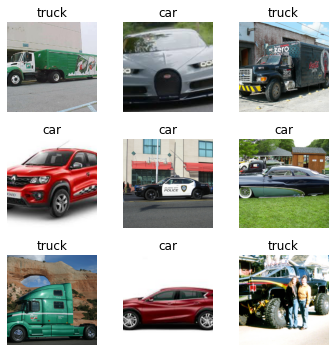

In [14]:
data.show_batch(rows=3, figsize=(5,5))

# ResNet-50

In [15]:
learn_resnet50 = cnn_learner(data, models.resnet50, metrics=accuracy)
learn_resnet50.fit(epochs = 10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.834740,0.362729,0.936170,00:14
1,0.421121,0.229967,0.957447,00:09
2,0.274755,0.243544,0.929078,00:07
3,0.182986,0.268181,0.943262,00:08
4,0.126838,0.261094,0.936170,00:10
5,0.090182,0.247735,0.936170,00:08
6,0.077108,0.275876,0.950355,00:07
7,0.064794,0.340649,0.936170,00:08
8,0.057318,0.301812,0.943262,00:10
9,0.046563,0.312411,0.950355,00:09


# ResNet-101

In [16]:
learn_resnet101 = cnn_learner(data, models.resnet101, metrics=accuracy)
learn_resnet101.fit(epochs = 10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.686122,0.145898,0.971631,00:11
1,0.359576,0.157022,0.957447,00:11
2,0.231209,0.165166,0.964539,00:11
3,0.156350,0.147506,0.957447,00:11
4,0.111533,0.176749,0.950355,00:11
5,0.087163,0.165927,0.957447,00:10
6,0.072033,0.199721,0.950355,00:10
7,0.063661,0.179826,0.957447,00:10
8,0.051437,0.203623,0.964539,00:11
9,0.045379,0.205360,0.950355,00:11


# ResNet-152

In [17]:
learn_resnet152 = cnn_learner(data, models.resnet152, metrics=accuracy)
learn_resnet152.fit(epochs = 10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.797787,0.362826,0.936170,00:15
1,0.430529,0.143091,0.964539,00:14
2,0.269052,0.198402,0.936170,00:15
3,0.170350,0.205738,0.950355,00:14
4,0.116573,0.163777,0.943262,00:14
5,0.088571,0.160292,0.950355,00:14
6,0.065636,0.198552,0.950355,00:14
7,0.047443,0.173444,0.957447,00:14
8,0.037788,0.199174,0.936170,00:16
9,0.030229,0.199342,0.943262,00:15


# DenseNet-121

In [18]:
learn_densenet121 = cnn_learner(data, models.densenet121, metrics=accuracy)
learn_densenet121.fit(epochs = 10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.651713,0.290056,0.893617,00:10
1,0.394514,0.315639,0.900709,00:08
2,0.250910,0.263946,0.914894,00:09
3,0.178067,0.265188,0.921986,00:10
4,0.126682,0.241017,0.921986,00:08
5,0.089565,0.243414,0.936170,00:08
6,0.068427,0.259226,0.914894,00:09
7,0.049152,0.336791,0.936170,00:08
8,0.036950,0.328872,0.929078,00:08
9,0.031214,0.313939,0.936170,00:08


# DenseNet-161

In [19]:
learn_densenet161 = cnn_learner(data, models.densenet161, metrics=accuracy)
learn_densenet161.fit(epochs = 10)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.655730,0.234011,0.921986,00:21
1,0.336578,0.138339,0.964539,00:14
2,0.221536,0.133791,0.943262,00:15
3,0.147814,0.141322,0.950355,00:14
4,0.103826,0.186026,0.950355,00:15
5,0.076561,0.177307,0.936170,00:15
6,0.062316,0.200661,0.929078,00:14
7,0.050067,0.195428,0.936170,00:14
8,0.036158,0.290550,0.943262,00:14
9,0.025999,0.280912,0.914894,00:14


# Predictions

In [20]:
def predict_car_or_truck(model_learn, filepath):
    img = open_image(filepath)
    return model_learn.predict(img)[0]

In [21]:
test['resnet50'] = test['filename'].apply(lambda x: predict_car_or_truck(learn_resnet50, x))
test['resnet50'] = test['resnet50'].astype('str')
test.head()

,filename,class,resnet50
0,/content/datasets/Datasets/truck/353219063.jpg,truck,truck
1,/content/datasets/Datasets/truck/785464468.jpg,truck,truck
2,/content/datasets/Datasets/car/images (42).jpg,car,car
3,/content/datasets/Datasets/car/312250.jpg,car,car
4,/content/datasets/Datasets/truck/288061061.jpg,truck,truck


In [22]:
test['resnet101'] = test['filename'].apply(lambda x: predict_car_or_truck(learn_resnet101, x))
test['resnet101'] = test['resnet101'].astype('str')
test.head()

,filename,class,resnet50,resnet101
0,/content/datasets/Datasets/truck/353219063.jpg,truck,truck,truck
1,/content/datasets/Datasets/truck/785464468.jpg,truck,truck,truck
2,/content/datasets/Datasets/car/images (42).jpg,car,car,car
3,/content/datasets/Datasets/car/312250.jpg,car,car,car
4,/content/datasets/Datasets/truck/288061061.jpg,truck,truck,truck


In [28]:
test['resnet152'] = test['filename'].apply(lambda x: predict_car_or_truck(learn_resnet152, x))
test['resnet152'] = test['resnet152'].astype('str')
test.head()

,filename,class,resnet50,resnet101,resnet152
0,/content/datasets/Datasets/truck/353219063.jpg,truck,truck,truck,car
1,/content/datasets/Datasets/truck/785464468.jpg,truck,truck,truck,truck
2,/content/datasets/Datasets/car/images (42).jpg,car,car,car,car
3,/content/datasets/Datasets/car/312250.jpg,car,car,car,car
4,/content/datasets/Datasets/truck/288061061.jpg,truck,truck,truck,truck


In [32]:
test['densenet121'] = test['filename'].apply(lambda x: predict_car_or_truck(learn_densenet121, x))
test['densenet121'] = test['densenet121'].astype('str')
test.head()

,filename,class,resnet50,resnet101,resnet152,densenet121
0,/content/datasets/Datasets/truck/353219063.jpg,truck,truck,truck,car,truck
1,/content/datasets/Datasets/truck/785464468.jpg,truck,truck,truck,truck,truck
2,/content/datasets/Datasets/car/images (42).jpg,car,car,car,car,car
3,/content/datasets/Datasets/car/312250.jpg,car,car,car,car,car
4,/content/datasets/Datasets/truck/288061061.jpg,truck,truck,truck,truck,truck


In [33]:
test['densenet161'] = test['filename'].apply(lambda x: predict_car_or_truck(learn_densenet161, x))
test['densenet161'] = test['densenet161'].astype('str')
test.head()

,filename,class,resnet50,resnet101,resnet152,densenet121,densenet161
0,/content/datasets/Datasets/truck/353219063.jpg,truck,truck,truck,car,truck,truck
1,/content/datasets/Datasets/truck/785464468.jpg,truck,truck,truck,truck,truck,truck
2,/content/datasets/Datasets/car/images (42).jpg,car,car,car,car,car,car
3,/content/datasets/Datasets/car/312250.jpg,car,car,car,car,car,car
4,/content/datasets/Datasets/truck/288061061.jpg,truck,truck,truck,truck,truck,truck


# Evaluation of models built

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
models = ['resnet50', 'resnet101', 'resnet152',
       'densenet121', 'densenet161']
scores = dict()
for model in models:
  scores[model] = [accuracy_score(test['class'], test[model])]

In [39]:
print("Accuracy scores:")
pd.DataFrame(scores)

Accuracy scores:


,resnet50,resnet101,resnet152,densenet121,densenet161
0,0.962025,0.962025,0.936709,0.924051,0.949367


In [26]:
confusion_matrix(test['class'], test['resnet50'])

array([[36,  3],
       [ 0, 40]])

In [27]:
confusion_matrix(test['class'], test['resnet101'])

array([[36,  3],
       [ 0, 40]])

In [30]:
confusion_matrix(test['class'], test['resnet152'])

array([[36,  3],
       [ 2, 38]])

In [40]:
confusion_matrix(test['class'], test['densenet121'])

array([[35,  4],
       [ 2, 38]])

In [41]:
confusion_matrix(test['class'], test['densenet161'])

array([[35,  4],
       [ 0, 40]])